In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import locale
import seaborn as sns
from babel.numbers import format_currency
import numpy as np

pd.set_option('display.max_rows', 2000)
locale.setlocale(locale.LC_ALL, '')

purchasers = pd.read_csv('purchaser.csv', parse_dates=['Date of Purchase'])
encashers = pd.read_csv('political_party.csv', parse_dates=['Date of Encashment'])

In [2]:
print(f"Total Number of Purchased Bonds: {purchasers.shape[0]}")
print(f"Total Number of Encashed  Bonds: {encashers.shape[0]}")
print(f"Missing from Purchased?: {encashers.shape[0] - purchasers.shape[0]}")
print(f"""Total Amount Purchased: {format_currency(purchasers['Denomination'].sum(),
                                                   "INR",
                                                   locale='en_IN')}
""")
print(f"""Total Amount Encashed: {format_currency(encashers['Denomination'].sum(),
                                                   "INR",
                                                   locale='en_IN')}
""")
print(f"""Total Unaccounted: {format_currency(encashers['Denomination'].sum() - purchasers['Denomination'].sum(),
                                                   "INR",
                                                   locale='en_IN')}
""")


Total Number of Purchased Bonds: 18871
Total Number of Encashed  Bonds: 20421
Missing from Purchased?: 1550
Total Amount Purchased: ₹1,21,55,51,32,000.00

Total Amount Encashed: ₹1,27,69,08,93,000.00

Total Unaccounted: ₹6,13,57,61,000.00



In [3]:
def clean_purchaser_df(df):
    df = df.copy()
    # remove in between space from all names
    df['ID'] = df['Purchaser Name'].str[:15].factorize()[0] + 1
    df['Year'] = df['Date of Purchase'].dt.year
    df['Month'] = df['Date of Purchase'].dt.month
    df['quarter'] = df['Date of Purchase'].dt.quarter
    id_map = df[['ID', 'Purchaser Name']].drop_duplicates().sort_values('ID')
    id_map.drop_duplicates(subset='ID', inplace=True)
    return id_map.merge(df[["ID", "Date of Purchase", "Denomination", "Year", "Month", "quarter"]], on='ID')

In [4]:
purchasers = clean_purchaser_df(purchasers)

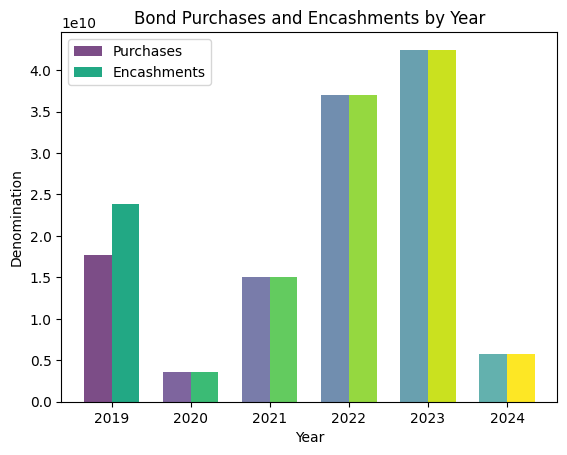

In [5]:
# Bond puchased by year, month and quarter

cmap = plt.get_cmap('viridis')

encashers['Year'] = encashers['Date of Encashment'].dt.year
encashers['Month'] = encashers['Date of Encashment'].dt.month
encashers['quarter'] = encashers['Date of Encashment'].dt.quarter
purchases_by_year = purchasers.groupby('Year')['Denomination'].sum()
encashments_by_year = encashers.groupby('Year')['Denomination'].sum()
all_years = sorted(set(purchases_by_year.index) | set(encashments_by_year.index))
purchases_by_year = purchases_by_year.reindex(all_years, fill_value=0)
encashments_by_year = encashments_by_year.reindex(all_years, fill_value=0)

fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(all_years))
colors1 = cmap(np.linspace(0, .5, len(all_years)))
colors2 = cmap(np.linspace(.6, 1, len(all_years)))

bars1 = ax.bar(index - bar_width/2, purchases_by_year, bar_width, label='Purchases', color=colors1, alpha=0.7)
bars2 = ax.bar(index + bar_width/2, encashments_by_year, bar_width, label='Encashments', color=colors2)

ax.set_xlabel('Year')
ax.set_ylabel('Denomination')
ax.set_title('Bond Purchases and Encashments by Year')
ax.set_xticks(index)
ax.set_xticklabels(all_years)
ax.legend()

plt.show()


In [6]:
# top pruchasers
purchasers.groupby('Purchaser Name')['Denomination'].sum().sort_values(ascending=False)[:25].reset_index()

,Purchaser Name,Denomination
0,FUTURE GAMING AND HOTEL SERVICES PVT LTD,13680000000
1,MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED,9660000000
2,QWIKSUPPLYCHAINPRIVATELIMITED,4100000000
3,HALDIA ENERGY LIMITED,3770000000
4,VEDANTA LIMITED,3756500000
5,ESSEL MINING AND INDS LTD,2245000000
6,WESTERN UP POWER TRANSMISSION COMPANY LI MITED,2200000000
7,BHARTI AIRTEL LIMITEDAIRTEL CURRE NT AC-GCO,1980000000
8,KEVENTER FOODPARK INFRA LIMITED,1950000000
9,MKJ ENTERPRISES LIMITED,1924200000


In [7]:
# Purchase by month and year
purchasers.groupby(['Purchaser Name', 'Year', 'Month'])['Denomination'].sum().sort_values(ascending=False)[:25].reset_index()

,Purchaser Name,Year,Month,Denomination
0,QWIKSUPPLYCHAINPRIVATELIMITED,2022,1,2350000000
1,FUTURE GAMING AND HOTEL SERVICES PVT LTD,2022,1,2100000000
2,FUTURE GAMING AND HOTEL SERVICES PVT LTD,2021,10,1950000000
3,MADANLAL LTD.,2019,5,1855000000
4,MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED,2023,10,1600000000
5,FUTURE GAMING AND HOTEL SERVICES PVT LTD,2023,4,1500000000
6,FUTURE GAMING AND HOTEL SERVICES PVT LTD,2020,10,1500000000
7,MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED,2023,4,1400000000
8,KEVENTER FOODPARK INFRA LIMITED,2019,5,1400000000
9,QWIKSUPPLYCHAINPRIVATELIMITED,2022,11,1250000000


In [8]:
purchasers[purchasers['Purchaser Name'] == 'FUTURE GAMING AND HOTEL SERVICES PVT LTD'].groupby(['Purchaser Name', 'Year', 'Month'])['Denomination'].sum().reset_index()

,Purchaser Name,Year,Month,Denomination
0,FUTURE GAMING AND HOTEL SERVICES PVT LTD,2020,10,1500000000
1,FUTURE GAMING AND HOTEL SERVICES PVT LTD,2021,4,1090000000
2,FUTURE GAMING AND HOTEL SERVICES PVT LTD,2021,7,300000000
3,FUTURE GAMING AND HOTEL SERVICES PVT LTD,2021,10,1950000000
4,FUTURE GAMING AND HOTEL SERVICES PVT LTD,2022,1,2100000000
5,FUTURE GAMING AND HOTEL SERVICES PVT LTD,2022,4,1000000000
6,FUTURE GAMING AND HOTEL SERVICES PVT LTD,2022,7,750000000
7,FUTURE GAMING AND HOTEL SERVICES PVT LTD,2022,10,1050000000
8,FUTURE GAMING AND HOTEL SERVICES PVT LTD,2022,12,100000000
9,FUTURE GAMING AND HOTEL SERVICES PVT LTD,2023,1,380000000


In [9]:
# MEGHA Engineering and Infrastructure Ltd 
purchasers[purchasers['Purchaser Name'] == 'MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED'].groupby(['Purchaser Name', 'Year', 'Month'])['Denomination'].sum().reset_index()

,Purchaser Name,Year,Month,Denomination
0,MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED,2019,4,650000000
1,MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED,2019,5,600000000
2,MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED,2019,10,50000000
3,MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED,2020,10,200000000
4,MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED,2021,4,780000000
5,MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED,2021,10,1000000000
6,MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED,2022,1,700000000
7,MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED,2022,4,250000000
8,MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED,2022,7,500000000
9,MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED,2022,10,100000000


In [10]:
encashers.head()

,Date of Encashment,Name of the Political Party,Denomination,Year,Month,quarter
0,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000,2019,4,2
1,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000,2019,4,2
2,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,10000000,2019,4,2
3,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000,2019,4,2
4,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000,2019,4,2


In [11]:
df1 = purchasers.groupby(['Year', 'Month', 'Purchaser Name'])['Denomination'].sum().sort_values(ascending=False).reset_index()

In [12]:
df2 = encashers.groupby(['Year', 'Month', 'Name of the Political Party'])['Denomination'].sum().sort_values(ascending=False).reset_index()

In [44]:
df1.head()

,Year,Month,Purchaser Name,Denomination
0,2022,1,QWIKSUPPLYCHAINPRIVATELIMITED,2350000000
1,2022,1,FUTURE GAMING AND HOTEL SERVICES PVT LTD,2100000000
2,2021,10,FUTURE GAMING AND HOTEL SERVICES PVT LTD,1950000000
3,2019,5,MADANLAL LTD.,1855000000
4,2023,10,MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED,1600000000


In [14]:
df2.head()

,Year,Month,Name of the Political Party,Denomination
0,2019,4,BHARTIYA JANTA PARTY,10568601000
1,2019,5,BHARTIYA JANTA PARTY,7147100000
2,2023,11,BHARTIYA JANTA PARTY,7020010000
3,2022,1,BHARTIYA JANTA PARTY,6622000000
4,2022,11,BHARTIYA JANTA PARTY,6028499000


In [45]:
df1[(df1.Month==month) & (df1.Year==year) & (df1.Denomination >=10000000)].sort_values(by='Denomination', ascending=False)[:10]

,Year,Month,Purchaser Name,Denomination
25,2019,4,MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED,650000000
31,2019,4,KEVENTER FOODPARK INFRA LIMITED,550000000
39,2019,4,ESSEL MINING AND INDS LTD,500000000
61,2019,4,PHL FINIVEST PVT LTD,400000000
62,2019,4,VEDANTA LIMITED,396500000
73,2019,4,LAKSHMI NIWAS MITTAL,350000000
82,2019,4,NAVAYUGAENGINEERING COMPANY LIMITED,300000000
122,2019,4,SUN PHARMA LABORATORIES LIMTED,215000000
158,2019,4,PRL DEVELOPERS PRIVATE LIMITED,200000000
161,2019,4,GRASIM INDUSTRIES LTD,200000000


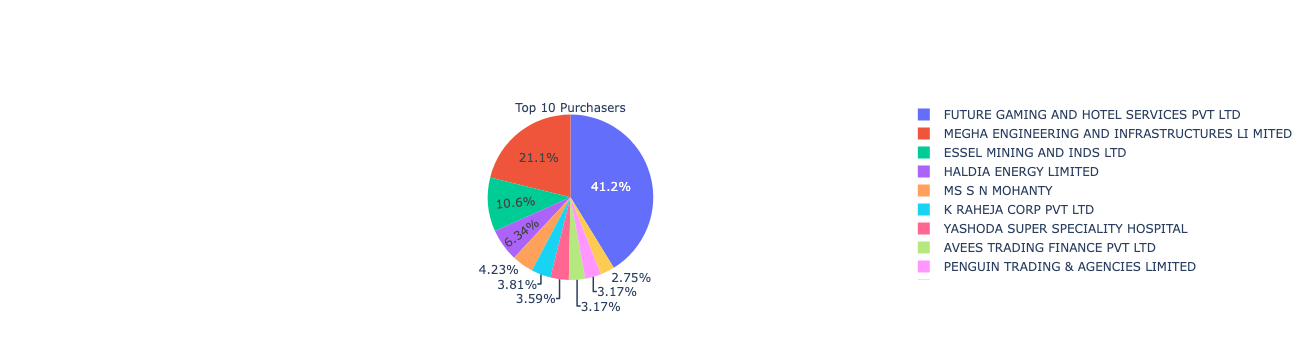

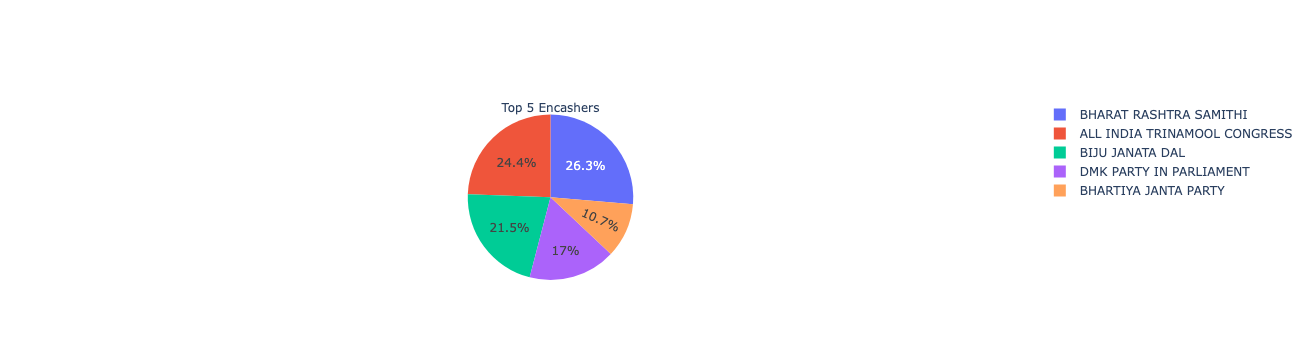

In [53]:
import plotly.graph_objects as go

# Sample data filtered by a specific month
# You should replace this with actual data after filtering based on the chosen month.
month = 10
year = 2021

_df1 = df1[(df1.Month==month) & (df1.Year==year) & (df1.Denomination >=10000000)].sort_values(by='Denomination', ascending=False)[:10]
_df2 = df2[(df2.Month==month) & (df2.Year==year) & (df2.Denomination >=100000000)].sort_values(by='Denomination', ascending=False)[:5]

purchasers_data = pd.Series(_df1["Denomination"].values, index=_df1["Purchaser Name"]).to_dict()

political_party_data = pd.Series(_df2["Denomination"].values, index=_df2["Name of the Political Party"]).to_dict()

# Define color lists for purchasers and political parties
purchaser_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
party_colors = ['#1f77b4', '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d']
# Create pie chart for top 10 purchasers
fig_purchasers = go.Figure(data=[go.Pie(labels=list(purchasers_data.keys()), values=list(purchasers_data.values()), title='Top 10 Purchasers')])

# Create pie chart for top 5 encashers
fig_encashers = go.Figure(data=[go.Pie(labels=list(political_party_data.keys()), values=list(political_party_data.values()), title='Top 5 Encashers')])

# Show the figures
fig_purchasers.show()
fig_encashers.show()